ДатаСет про покупки в інтернет-магазині:

***order_date, time***  — дата та час замовлення;

***aging*** — інтервал часу між створенням та доставкою замовлення;

***customer_id*** — ідентифікатор клієнта;

***gender*** — стать клієнта;

***device_type*** — девайс (браузер або смартфон), з якого зроблене замовлення;

***customer_login_type*** — тип логіна клієнта (зареєстрований клієнт, гість тощо);

***product_category*** — категорія товару;

***product*** — назва товару;

***sales*** — ціна продажу;

***quantity*** — кількість одиниць товару у замовленні;

**discount** — діюча знижка;

***profit*** — прибуток від продажу;

***shipping_cost*** — витрати на доставку замовлення;

***order_priority*** — пріоритет замовлення;

***payment_method*** — метод оплати замовлення.

# ***1.***

***Завантаж [набір даних.](https://drive.google.com/file/d/10s_aBbdqvQOJ2ItX7QVs-I5CPg6j-ErJ/view)***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path = '/content/drive/My Drive/sales_data_updated.csv'
df = pd.read_csv(file_path)
df.head(5)

,order_date,time,aging,customer_id,gender,device_type,customer_login_type,product_category,product,sales,quantity,discount,profit,shipping_cost,order_priority,payment_method
0,2018-01-01,10:11:40,5.0,29317,Male,Web,Member,Auto & Accessories,Car Media Players,140.0,4.0,0.3,43.2,4.3,Medium,e_wallet
1,2018-01-01,22:30:44,7.0,42270,Male,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,5.0,0.1,139.5,13.9,High,money_order
2,2018-01-01,21:55:31,10.0,14563,Male,Web,Member,Auto & Accessories,Car Speakers,211.0,5.0,0.1,120.5,12.0,High,credit_card
3,2018-01-01,13:57:15,9.0,58601,Male,Web,Member,Auto & Accessories,Tyre,250.0,4.0,0.2,150.0,15.0,Critical,credit_card
4,2018-01-01,15:17:41,2.0,48342,Male,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.1,165.0,16.5,High,credit_card


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date           51290 non-null  object 
 1   time                 51290 non-null  object 
 2   aging                51289 non-null  float64
 3   customer_id          51290 non-null  int64  
 4   gender               51290 non-null  object 
 5   device_type          51290 non-null  object 
 6   customer_login_type  51290 non-null  object 
 7   product_category     51290 non-null  object 
 8   product              51290 non-null  object 
 9   sales                51289 non-null  float64
 10  quantity             51288 non-null  float64
 11  discount             51289 non-null  float64
 12  profit               51290 non-null  float64
 13  shipping_cost        51289 non-null  float64
 14  order_priority       51288 non-null  object 
 15  payment_method       51290 non-null 

In [4]:
df.isnull().sum()

,0
order_date,0
time,0
aging,1
customer_id,0
gender,0
device_type,0
customer_login_type,0
product_category,0
product,0
sales,1


In [5]:
df["order_date"] = pd.to_datetime(df["order_date"], format="%Y-%m-%d")

In [6]:
df.head()

,order_date,time,aging,customer_id,gender,device_type,customer_login_type,product_category,product,sales,quantity,discount,profit,shipping_cost,order_priority,payment_method
0,2018-01-01,10:11:40,5.0,29317,Male,Web,Member,Auto & Accessories,Car Media Players,140.0,4.0,0.3,43.2,4.3,Medium,e_wallet
1,2018-01-01,22:30:44,7.0,42270,Male,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,5.0,0.1,139.5,13.9,High,money_order
2,2018-01-01,21:55:31,10.0,14563,Male,Web,Member,Auto & Accessories,Car Speakers,211.0,5.0,0.1,120.5,12.0,High,credit_card
3,2018-01-01,13:57:15,9.0,58601,Male,Web,Member,Auto & Accessories,Tyre,250.0,4.0,0.2,150.0,15.0,Critical,credit_card
4,2018-01-01,15:17:41,2.0,48342,Male,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.1,165.0,16.5,High,credit_card


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_date           51290 non-null  datetime64[ns]
 1   time                 51290 non-null  object        
 2   aging                51289 non-null  float64       
 3   customer_id          51290 non-null  int64         
 4   gender               51290 non-null  object        
 5   device_type          51290 non-null  object        
 6   customer_login_type  51290 non-null  object        
 7   product_category     51290 non-null  object        
 8   product              51290 non-null  object        
 9   sales                51289 non-null  float64       
 10  quantity             51288 non-null  float64       
 11  discount             51289 non-null  float64       
 12  profit               51290 non-null  float64       
 13  shipping_cost        51289 non-

In [8]:
df.shape

(51290, 16)

In [9]:
plt.rcParams.update({
    "figure.figsize": (12, 8),
    "axes.titlesize": 16,
    "axes.titleweight": "semibold",
    "axes.titlecolor": "blue",
    "axes.labelsize": 12,
    "axes.labelcolor": "blue",
    "axes.labelweight": "light",
    "xtick.color": "grey",
    "ytick.color": "grey",
    "font.style": "italic",
})


In [10]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# ***2.***

***Побудуй гістограму для візуалізації розподілу ціни продажу (sales).***


***Проаналізуй, які продажі зустрічаються найчастіше, який характер розподілу значень загалом.***

In [11]:
plt.style.use('classic')

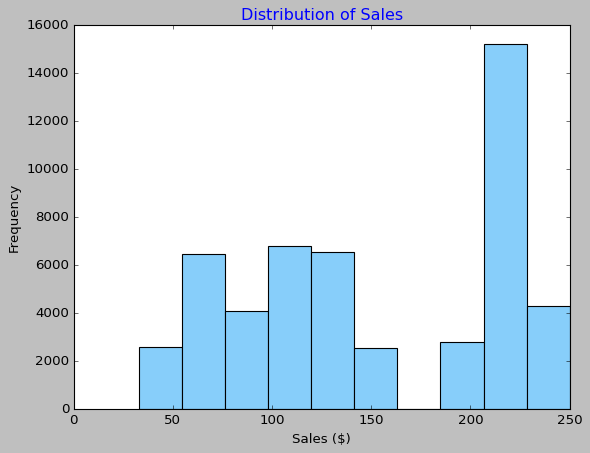

In [12]:
plt.hist(df["sales"], bins=10, color='lightskyblue')
plt.title("Distribution of Sales")
plt.xlabel("Sales ($)")
plt.ylabel("Frequency")

plt.show()

***Найчастіше купують товари вартістю ~ 210-230$. Частота продажів більше 14К, що свідчить про масовість цих товарів.***


---
***Асиметричний розподіл.***

***Правосторонньо скошений розподіл. Багато малих продажів, товари з вищою ціновою пропозицією купують менше.***



# ***3.***


***Створи лінійний графік, який показує зміну продажів (sales) у часі (order_date).Перед цим потрібно переконатись у тому, що стовпчик order_date має відповідний тип даних. Це допоможе зрозуміти тенденцію покупок протягом зазначеного періоду. Якою є ця тенденція згідно з графіком?***

In [13]:
daily_sales = df.groupby("order_date")["sales"].sum()
daily_sales

,sales
order_date,
2018-01-01,11988.0
2018-01-02,11177.0
2018-01-03,15927.0
2018-01-04,14778.0
2018-01-05,13435.0
...,...
2018-12-26,24769.0
2018-12-27,26553.0
2018-12-28,26159.0


In [14]:
df_year = df["order_date"].dt.year
df_year

,order_date
0,2018
1,2018
2,2018
3,2018
4,2018
...,...
51285,2018
51286,2018
51287,2018
51288,2018


In [15]:
df_year.unique()

array([2018], dtype=int32)

In [16]:
plt.style.use('fivethirtyeight')

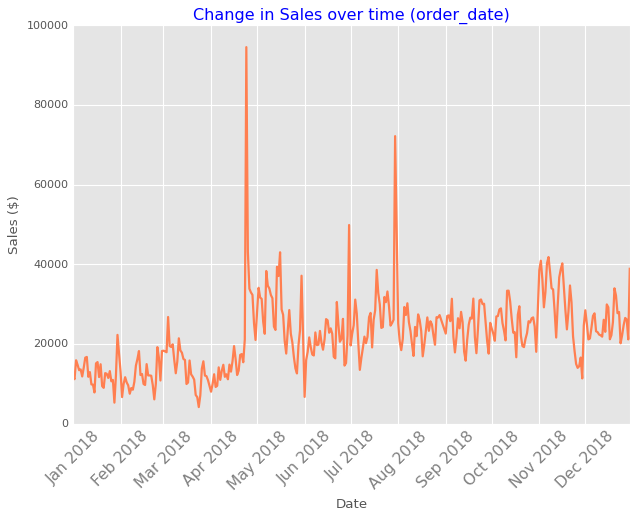

In [27]:
plt.plot(daily_sales.index, daily_sales.values, color='coral')
plt.title("Сhange in Sales over time (order_date)")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.tick_params(axis="x", rotation=45, colors="grey", labelsize=14)

plt.show()

***Продажі коливаються, але є піки. Це квітень, липень***

---
***Січень-квітень стабільно низькі продажі***


---
***Травень-серпень збільшуться продажі. Потім різкий спад до листопада.***




# ***4.***

***Побудуй стовпчастий графік, що показує кількість замовлень за категоріями товарів (product_category). Використовуй групування даних. Яка категорія найбільш популярна? Яка найменш популярна?***

In [18]:
product_count = df.groupby('product_category').size()
product_count

,0
product_category,
Auto & Accessories,7505
Electronic,2701
Fashion,25646
Home & Furniture,15438


In [19]:
plt.style.use("Solarize_Light2")

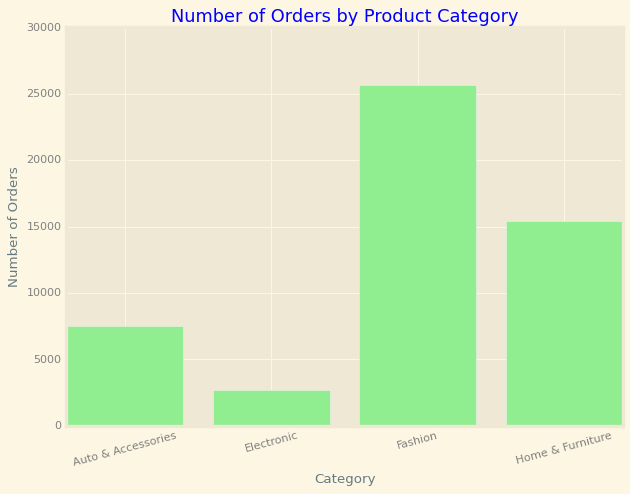

In [20]:
plt.bar(product_count.index, product_count.values, color='lightgreen')

plt.title("Number of Orders by Product Category")
plt.xlabel("Category")
plt.ylabel("Number of Orders")
plt.tick_params(axis="x", rotation=15, colors="grey", labelsize=10)
plt.tick_params(axis="y", colors="grey", labelsize=10)
plt.show()

***Найбільш популярна категорія - Fashion***


---



***Найменш популярна - Electronic***

# ***5.***


***Створи діаграму розсіювання для візуалізації взаємозв'язку між прибутком (profit) та загальною сумою продажу (sales). Подумай, чи є зв'язок між цими показниками і який характер цього взаємозв'язку.***


# **a**

In [28]:
profit_total_sales = df.groupby("profit")["sales"].sum()
profit_total_sales

,sales
profit,
0.5,1245.0
0.8,16745.0
1.3,1909.0
1.6,22015.0
1.8,10028.0
...,...
162.5,22750.0
163.0,50096.0
165.0,25750.0


In [29]:
plt.style.use("dark_background")

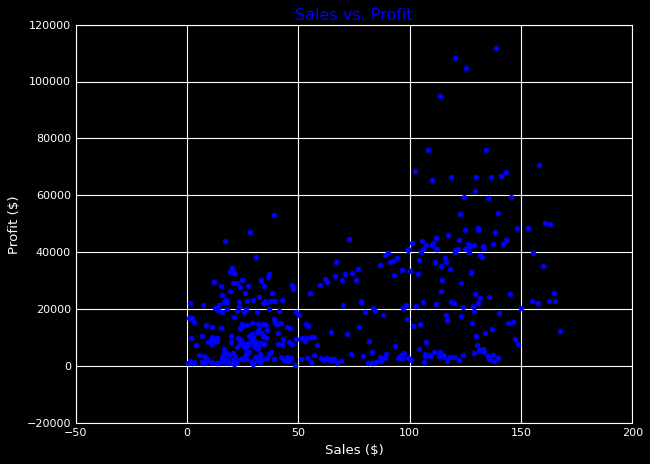

In [30]:
plt.scatter(profit_total_sales.index, profit_total_sales.values, color='blue')

plt.title("Sales vs. Profit")
plt.xlabel("Sales ($)")
plt.ylabel("Profit ($)")
plt.show()

#***b***

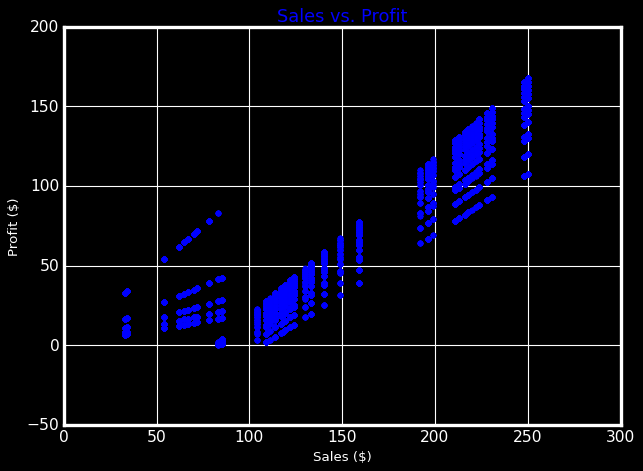

In [24]:
plt.scatter(df["sales"], df["profit"], color='blue')

plt.title("Sales vs. Profit")
plt.xlabel("Sales ($)")
plt.ylabel("Profit ($)")
plt.show()

***Переважно зі збільшенням продажів, росте прибуток***

---
***Але, деякі позиції з низької вартості, теж мають високі прибутки.***


# ***6.***

***Створи масив графіків (2x2) з попередніх візуалізацій, щоб
на одному малюнку побачити всі графіки та порівняти їх.***

In [25]:
plt.style.use("ggplot")

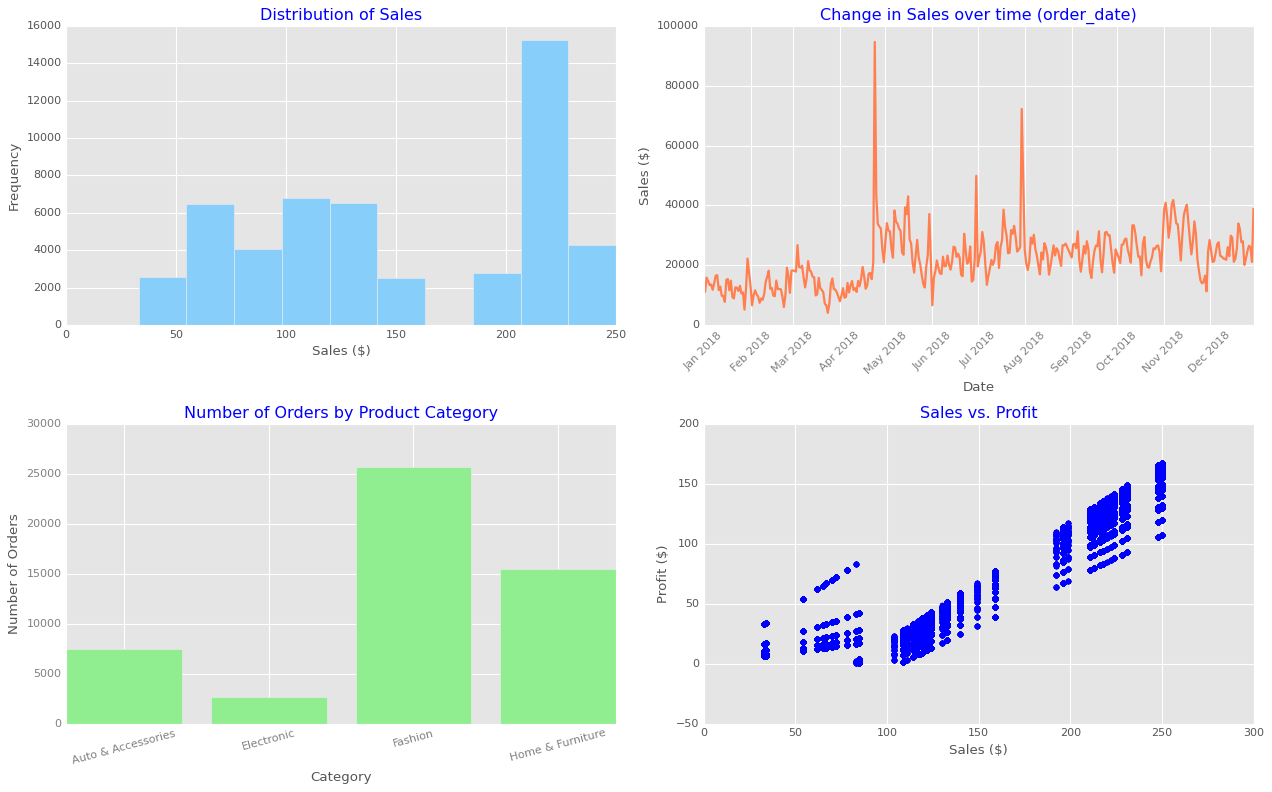

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

axs[0, 0].hist(df["sales"], bins=10, color='lightskyblue')
axs[0, 0].set_title("Distribution of Sales")
axs[0, 0].set_xlabel("Sales ($)")
axs[0, 0].set_ylabel("Frequency")

axs[0, 1].plot(daily_sales.index, daily_sales.values, color='coral')
axs[0, 1].set_title("Сhange in Sales over time (order_date)")
axs[0, 1].set_xlabel("Date")
axs[0, 1].set_ylabel("Sales ($)")
axs[0, 1].tick_params(axis="x", rotation=45, colors="grey", labelsize=10)


axs[1, 0].bar(product_count.index, product_count.values, color='lightgreen')
axs[1, 0].set_title("Number of Orders by Product Category" )
axs[1, 0].set_xlabel("Category")
axs[1, 0].set_ylabel("Number of Orders")
axs[1, 0].tick_params(axis="x", rotation=15, colors="grey", labelsize=10)
axs[1, 0].tick_params(axis="y", colors="grey", labelsize=10)


axs[1, 1].scatter(df["sales"], df["profit"], color='blue')
axs[1, 1].set_title("Sales vs. Profit")
axs[1, 1].set_xlabel("Sales ($)")
axs[1, 1].set_ylabel("Profit ($)")


plt.tight_layout()
plt.show()